
# **Table of Contents**

**1.** [**Introduction**](#Section1)<br>
**2.** [**Problem Statement**](#Section2)<br>
**3.** [**Importing Libraries**](#Section3)<br>

**4.** [**Data Acquisition & Information**](#Section4)<br>

**5.** [**Exploratory Data Analysis**](#Section6)<br>
 
**6.** [**Model Building**](#Section7)<br>
  
**7.** [**Scaling**](#Section7)<br>  
  
**8.** [**Linear Regression**](#Section7)<br> 
    
**9.** [**RandomForest Regression**](#Section7)<br> 

**10.** [**Model Evaluation & Tuning**](#Section7)<br> 

**11.** [**Conclusion**](#Section8)<br>

## 1. Introduction

Concrete is considered by many to be a strong and durable material, and rightfully so. But there are different ways to assess concrete strength. Perhaps even more importantly, these strength properties each add different qualities to concrete that make it an ideal choice in various use cases.

The company has developed a new concrete solution which can be a potential game-changer for the company in the market but they are not sure about the concrete compressive strength which is a very important factor for concrete sale.

## 2. Problem Statement


The company is under a time crunch to test the compressive strength of the concrete to release in the market. Previously they were using manual methods to test the compressive strength of the concrete which is very time-consuming and inefficient. They want to automate the process of predicting the compressive strength of the concrete, based on the materials used.<br><br><br>

<center><img src="https://raw.githubusercontent.com/S-V-Singh/MachineLearningUsingPython/main/Images/Compressive-Strength-of-concrete.jpg"></center>

## 3. Import Libraries

In [1]:
import numpy as np
import pandas as pd
pd.set_option('max_rows',None)
pd.set_option('max_columns',None)
pd.set_option('mode.chained_assignment',None)
#---------------------------------
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
#------------------------------------------
import warnings
warnings.filterwarnings("ignore")


## 4. Data Acquisition & Information

In [2]:
train_data=pd.read_csv('C:/Users/HP/Desktop/Capstion Project/concrete_train.csv')
test_data=pd.read_csv('C:/Users/HP/Desktop/Capstion Project/concrete_test.csv')

In [3]:
train_data.head(5)

,Id,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
0,995,158.6,148.9,116.0,175.1,15.0,953.3,719.7,28,27.68
1,507,424.0,22.0,132.0,178.0,8.5,822.0,750.0,28,62.05
2,334,275.1,0.0,121.4,159.5,9.9,1053.6,777.5,3,23.80
3,848,252.0,97.0,76.0,194.0,8.0,835.0,821.0,28,33.40
4,294,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,3,7.40


In [45]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 824 entries, 0 to 823
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Id                824 non-null    int64  
 1   cement            824 non-null    float64
 2   slag              824 non-null    float64
 3   flyash            824 non-null    float64
 4   water             824 non-null    float64
 5   superplasticizer  824 non-null    float64
 6   coarseaggregate   824 non-null    float64
 7   fineaggregate     824 non-null    float64
 8   age               824 non-null    int64  
 9   csMPa             824 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 64.5 KB


In [4]:
train_data.describe()

,Id,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
count,824.000000,824.000000,824.000000,824.000000,824.000000,824.000000,824.000000,824.000000,824.000000,824.000000
mean,513.847087,283.360801,74.371602,53.160801,181.797087,6.163956,973.548544,772.107403,44.661408,35.857864
std,296.786779,107.536404,86.977784,64.000646,21.321905,5.967258,78.694630,80.984717,60.475702,16.865099
min,0.000000,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,251.750000,192.000000,0.000000,0.000000,164.900000,0.000000,932.000000,726.775000,12.250000,23.685000
50%,513.500000,275.100000,22.000000,0.000000,185.350000,6.100000,968.000000,778.500000,28.000000,34.080000
75%,770.250000,359.900000,144.775000,118.300000,192.000000,10.125000,1040.600000,821.250000,56.000000,45.862500
max,1028.000000,540.000000,359.400000,195.000000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [5]:
print('Unique ID: ',len(train_data['Id']))

Unique ID:  824


In [6]:
train_data1=train_data.drop(['Id'],axis=1)
test_data1=test_data.drop(['Id'],axis=1)

<AxesSubplot:xlabel='age_group', ylabel='csMPa'>

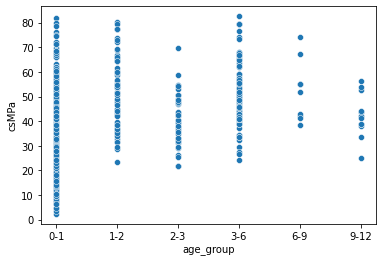

In [66]:
sns.scatterplot(x='age_group',y='csMPa',data=train_data1)

## 5. Exploratory Data Analysis

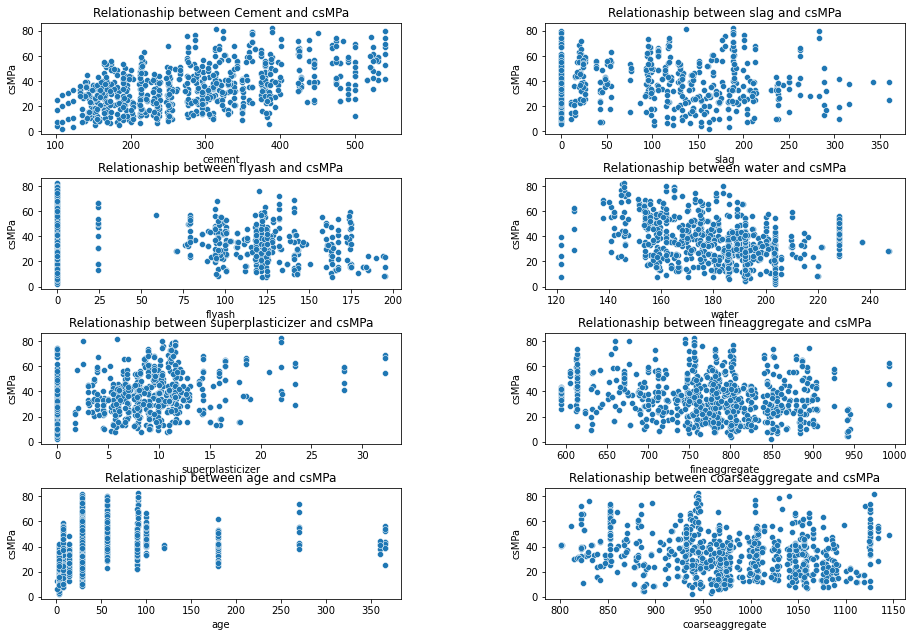

In [7]:
fig,ax=plt.subplots(4,2,figsize=(15,10))

sns.scatterplot(x='cement',y='csMPa',data=train_data1,ax=ax[0,0])
ax[0,0].set_xlabel('cement')
ax[0,0].set_ylabel('csMPa')
ax[0,0].set_title('Relationaship between Cement and csMPa')

sns.scatterplot(x='slag',y='csMPa',data=train_data1,ax=ax[0,1])
ax[0,1].set_xlabel('slag')
ax[0,1].set_ylabel('csMPa')
ax[0,1].set_title('Relationaship between slag and csMPa')

sns.scatterplot(x='flyash',y='csMPa',data=train_data1,ax=ax[1,0])
ax[1,0].set_xlabel('flyash')
ax[1,0].set_ylabel('csMPa')
ax[1,0].set_title('Relationaship between flyash and csMPa')

sns.scatterplot(x='water',y='csMPa',data=train_data1,ax=ax[1,1])
ax[1,1].set_xlabel('water')
ax[1,1].set_ylabel('csMPa')
ax[1,1].set_title('Relationaship between water and csMPa')

sns.scatterplot(x='superplasticizer',y='csMPa',data=train_data1,ax=ax[2,0])
ax[2,0].set_xlabel('superplasticizer')
ax[2,0].set_ylabel('csMPa')
ax[2,0].set_title('Relationaship between superplasticizer and csMPa')

sns.scatterplot(x='fineaggregate',y='csMPa',data=train_data1,ax=ax[2,1])
ax[2,1].set_xlabel('fineaggregate')
ax[2,1].set_ylabel('csMPa')
ax[2,1].set_title('Relationaship between fineaggregate and csMPa')

sns.scatterplot(x='age',y='csMPa',data=train_data1,ax=ax[3,0])
ax[3,0].set_xlabel('age')
ax[3,0].set_ylabel('csMPa')
ax[3,0].set_title('Relationaship between age and csMPa')

sns.scatterplot(x='coarseaggregate',y='csMPa',data=train_data1,ax=ax[3,1])
ax[3,1].set_xlabel('coarseaggregate')
ax[3,1].set_ylabel('csMPa')
ax[3,1].set_title('Relationaship between coarseaggregate and csMPa')

plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)

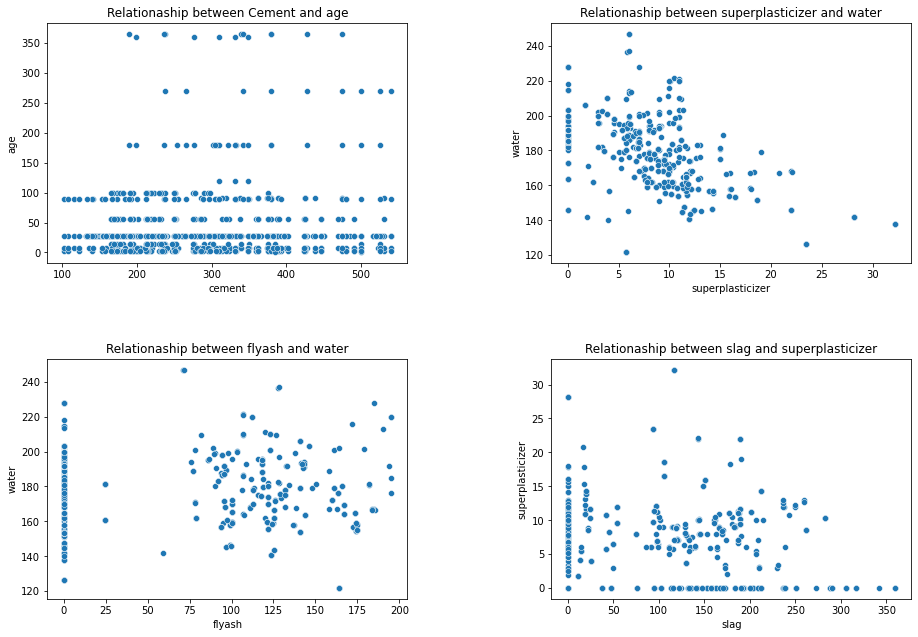

In [8]:
fig,ax=plt.subplots(2,2,figsize=(15,10))

sns.scatterplot(x='cement',y='age',data=train_data1,ax=ax[0,0])
ax[0,0].set_xlabel('cement')
ax[0,0].set_ylabel('age')
ax[0,0].set_title('Relationaship between Cement and age')

sns.scatterplot(x='superplasticizer',y='water',data=train_data1,ax=ax[0,1])
ax[0,1].set_xlabel('superplasticizer')
ax[0,1].set_ylabel('water')
ax[0,1].set_title('Relationaship between superplasticizer and water')

sns.scatterplot(x='flyash',y='water',data=train_data1,ax=ax[1,0])
ax[1,0].set_xlabel('flyash')
ax[1,0].set_ylabel('water')
ax[1,0].set_title('Relationaship between flyash and water')

sns.scatterplot(x='slag',y='superplasticizer',data=train_data1,ax=ax[1,1])
ax[1,1].set_xlabel('slag')
ax[1,1].set_ylabel('superplasticizer')
ax[1,1].set_title('Relationaship between slag and superplasticizer')

plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)

## 6. Model Building

In [9]:
#model building
X=train_data1.drop(['csMPa'],axis=1)
y=train_data1['csMPa']

In [10]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [11]:
print('Xtrain: ',X_train.shape)
print('ytrain: ',y_train.shape)
print('Xtest: ',X_test.shape)
print('ytest: ',y_test.shape)

Xtrain:  (659, 8)
ytrain:  (659,)
Xtest:  (165, 8)
ytest:  (165,)


## 7. Scaling

In [12]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc.fit(X_train)
sc.transform(X_train)
sc.transform(X_test)

array([[-1.07028287, -0.39856172,  1.73237849, ...,  1.06463852,
         0.12856953, -0.7115703 ],
       [ 2.3574809 , -0.8736694 , -0.84375456, ..., -1.55063846,
         1.5389741 , -0.27647823],
       [ 0.54311544, -0.8736694 , -0.84375456, ..., -0.08350099,
         0.13974351, -0.27647823],
       ...,
       [-0.41454496,  1.80656994, -0.84375456, ..., -0.53921236,
        -2.18196119, -0.64195557],
       [-0.86271116,  1.27052207, -0.84375456, ..., -0.53921236,
        -1.23838067,  0.8025501 ],
       [-1.10802318,  0.96582118,  1.16934087, ..., -0.17211153,
        -1.59843113, -0.27647823]])

In [13]:
sc.transform(test_data1)

array([[-0.14564524,  0.41284548, -0.84375456, ..., -0.53921236,
        -1.23838067,  5.58856287],
       [ 0.76578327,  1.25923685, -0.84375456, ..., -0.37844752,
        -0.17312792, -0.64195557],
       [ 1.0233609 ,  1.25923685, -0.84375456, ..., -0.37844752,
        -0.17312792, -0.27647823],
       ...,
       [ 0.04588684,  1.39353095, -0.84375456, ...,  0.37980558,
         0.42157612, -0.64195557],
       [ 1.34509705, -0.6253946 ,  1.2322501 , ..., -1.9316638 ,
        -0.24513801,  0.21082489],
       [ 0.54311544, -0.8736694 , -0.84375456, ..., -0.08350099,
         0.13974351,  0.8025501 ]])

## 8. Linear Regression Model

In [14]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,y_train)
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

In [15]:
from sklearn.metrics import mean_squared_error
MSE_train = mean_squared_error(y_train, y_train_pred)
MSE_test = mean_squared_error(y_test, y_test_pred)

In [16]:
print('RMSE_train: ',np.sqrt(MSE_train))
print('RMSE_train: ',np.sqrt(MSE_test))

RMSE_train:  10.555434669907704
RMSE_train:  10.471304733879222


In [17]:
from sklearn.metrics import r2_score
r2_score_train = r2_score(y_train, y_train_pred)
r2_score_test = r2_score(y_test, y_test_pred)

In [18]:
print('r2_score_train: ',r2_score_train)
print('r2_score_test: ',r2_score_test)

r2_score_train:  0.6081859124654193
r2_score_test:  0.6096467150860273


## 9. Random Forest Classifier

In [19]:
## n_estimator value used from below hyper parameter tuning 

from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor(n_estimators=40,random_state=20)
rf.fit(X_train,y_train)
y_train_pred_rf = rf.predict(X_train)
y_test_pred_rf = rf.predict(X_test)

In [20]:
from sklearn.metrics import mean_squared_error
MSE_train_rf = mean_squared_error(y_train, y_train_pred_rf)
MSE_test_rf = mean_squared_error(y_test, y_test_pred_rf)

In [21]:
print('RMSE_train: ',np.sqrt(MSE_train_rf))
print('RMSE_train: ',np.sqrt(MSE_test_rf))

RMSE_train:  2.253202540789807
RMSE_train:  4.858319453320858


In [ ]:
#Trying other metrics to check best possible though ultimate evaluation parameter is RMSE only.

In [22]:
from sklearn.metrics import r2_score
r2_score_train_rf = r2_score(y_train, y_train_pred_rf)
r2_score_test_rf = r2_score(y_test, y_test_pred_rf)

In [23]:
print('r2_score_train: ',r2_score_train_rf)
print('r2_score_test: ',r2_score_test_rf)

r2_score_train:  0.9821462985942366
r2_score_test:  0.9159711582568977


In [24]:
SS_Residual = sum((y_test-y_test_pred_rf)**2)
SS_Total = sum((y_test-np.mean(y_test))**2)
r_squared = 1 - (float(SS_Residual))/SS_Total
adjusted_r_squared = 1 - (1-r_squared)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print(r_squared, adjusted_r_squared)

0.9159711582568978 0.9116619868854566


In [25]:
## predicted value from test data
test_data_pred=rf.predict(test_data1)

## 10. Model Evaluation & Tuning

In [33]:
# As Model with WOE and SMOTE is the best data set having best score in all aspect. only evaluating the last model
#Model Comparison
from sklearn import model_selection
lr = LinearRegression()
rf = RandomForestRegressor()
models = []
models.append(('Logistic Regression',lr))
models.append(('Random Forest Classifier',rf))

Logistic Regression: -114.620703 (19.407649)
Random Forest Classifier: -29.562148 (8.704510)


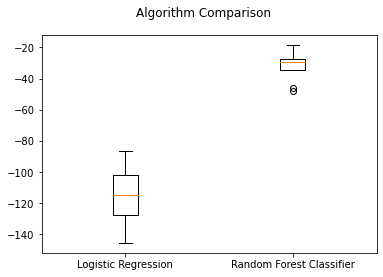

In [39]:
# evaluate each model in turn
results = []
names = []
for name, model in models:
	kfold = model_selection.KFold(n_splits=10)
	cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold,scoring='neg_mean_squared_error')
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, np.median(cv_results), cv_results.std())
	print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

Automatically created module for IPython interactive environment


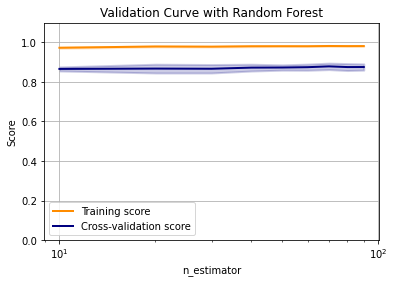

In [26]:
# As Randome Forest Classifier giving best results. Tuning only Random Forest Classifier Model.
from sklearn.ensemble import RandomForestRegressor
print(__doc__)
param_range=np.arange(0,100,10)
from sklearn.model_selection import validation_curve
train_scores, test_scores = validation_curve(RandomForestRegressor(), X_train, y_train,
                                             param_name="n_estimators", param_range=param_range, n_jobs=1)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.title("Validation Curve with Random Forest")
plt.xlabel("n_estimator")
plt.ylabel("Score")
plt.ylim(0.0, 1.1)
lw = 2
plt.semilogx(param_range, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.semilogx(param_range, test_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")
plt.grid()
plt.show();

In [40]:
cross_val_score(model, X_train, y_train, cv=kfold,scoring='neg_mean_squared_error')

NameError: name 'cross_val_score' is not defined

In [27]:
### Concat ID and predcated strenth in DataFrame

In [28]:
s1=pd.Series(test_data_pred)

In [29]:
new_data=pd.concat([test_data['Id'],s1],axis=1)

In [31]:
new_data.to_csv('csMPa')

## 11. Conculsion

Cement has positive corelation with compresive strength.<br>
Water has  negative corelation with compresive strength.<br>
Water with Superplasiticizer has negative corelation.<br>

RMSE for Train and Test is 2.25 & 4.85 respectively for  Random Forest Regressor. RF regressor is better than Linear REgression.